## LIBRARIES TO IMPORT

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.datasets import load_digits
import cv2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

## LOADING MNIST DATASET AND CHECKING THE KEY VALUES

In [2]:
mnist = load_digits()

In [3]:
type(mnist)

sklearn.utils.Bunch

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [5]:
mnist.data.shape

(1797, 64)

In [6]:
mnist.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

## ASSIGNING THE DATA AND TARGET VARIABLES TO X & y respectively

In [7]:
X=mnist.data
y=mnist.target

In [8]:
X.shape

(1797, 64)

In [9]:
y.shape

(1797,)

# CREATING A DATAFRAME TO SEE THE DATA VALUES

In [10]:
df=pd.DataFrame(X,columns=mnist.feature_names)
print(df.head())

   pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
0        0.0        0.0        5.0       13.0        9.0        1.0   
1        0.0        0.0        0.0       12.0       13.0        5.0   
2        0.0        0.0        0.0        4.0       15.0       12.0   
3        0.0        0.0        7.0       15.0       13.0        1.0   
4        0.0        0.0        0.0        1.0       11.0        0.0   

   pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_6  pixel_6_7  \
0        0.0        0.0        0.0        0.0  ...        0.0        0.0   
1        0.0        0.0        0.0        0.0  ...        0.0        0.0   
2        0.0        0.0        0.0        0.0  ...        5.0        0.0   
3        0.0        0.0        0.0        8.0  ...        9.0        0.0   
4        0.0        0.0        0.0        0.0  ...        0.0        0.0   

   pixel_7_0  pixel_7_1  pixel_7_2  pixel_7_3  pixel_7_4  pixel_7_5  \
0        0.0        0.0        6.0       13.0

## SPLITING THE DATA INTO TRAIN & VAL SETS

In [11]:
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.14,random_state=21,stratify=y)
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)
prediction = knn.predict(X_val)

print(prediction)
print(knn.score(X_val,y_val))

[1 2 4 9 3 1 0 4 3 0 1 2 2 8 7 8 1 6 8 7 4 9 9 9 0 3 3 6 4 1 2 7 4 9 7 0 7
 7 3 1 7 8 9 5 2 2 8 6 1 3 9 0 6 3 5 2 4 8 7 3 9 1 5 4 5 1 2 8 4 2 5 7 2 4
 3 3 1 0 2 4 5 4 3 7 7 3 2 6 9 5 7 0 9 9 2 6 7 5 5 6 5 7 8 5 8 6 1 4 2 1 1
 4 0 9 0 7 1 8 8 1 5 1 9 3 3 5 7 6 8 9 1 5 5 5 2 8 3 8 4 6 6 7 6 6 6 2 0 6
 3 3 0 4 5 8 0 0 8 9 5 1 1 0 0 7 3 7 7 5 8 5 4 1 7 2 7 0 2 4 0 5 3 2 3 7 9
 2 2 6 7 8 9 3 8 9 2 4 8 1 6 7 5 8 3 2 7 6 0 4 6 3 2 5 8 4 4 0 0 6 9 8 9 1
 0 8 0 6 0 1 3 6 9 9 3 0 4 1 2 6 9 9 1 5 4 0 1 5 3 6 4 1 5 6]
0.9920634920634921


## CHECKING THE LENGTH OF THE TRAIN AND VAL DATA

In [12]:
print("training data points: {}".format(len(y_train)))
print("validation data points: {}".format(len(y_val)))

training data points: 1545
validation data points: 252


## FINDING THE BEST K-VALUE BASED ON THE ACCURACY

In [13]:
kvalues = range(1, 30, 2)
accuracies = []

for k in range(1, 30,2):
          model = KNeighborsClassifier(n_neighbors=k)
          model.fit(X_train,y_train)
          # evaluate the model and update the accuracies list
          score = model.score(X_val,y_val)
          print("k=%d, accuracy=%.2f%%" % (k, score * 100))
          accuracies.append(score*100)


k=1, accuracy=98.41%
k=3, accuracy=97.62%
k=5, accuracy=97.62%
k=7, accuracy=98.81%
k=9, accuracy=99.21%
k=11, accuracy=98.81%
k=13, accuracy=98.41%
k=15, accuracy=98.02%
k=17, accuracy=97.22%
k=19, accuracy=97.22%
k=21, accuracy=96.83%
k=23, accuracy=96.43%
k=25, accuracy=97.22%
k=27, accuracy=96.03%
k=29, accuracy=96.03%


# VISUALIZING ACCURACIES AGAINST DIFFERENT K-VALUES

Text(0, 0.5, 'Accuracy(%)')

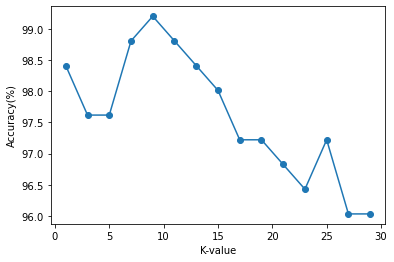

In [14]:
plt.plot(kvalues,accuracies,markersize=6,marker='o')
plt.xlabel('K-value')
plt.ylabel('Accuracy(%)')

In [15]:
i = np.argmax(accuracies)
#print(i)
print("k=%d achieved highest accuracy of %.2f%% on validation data" % (kvalues[i],accuracies[i]))

k=9 achieved highest accuracy of 99.21% on validation data


## SPLITING THE DATA INTO TRAIN & TEST SETS

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.13,random_state=30,stratify=y)
model = KNeighborsClassifier(n_neighbors=kvalues[i])
model.fit(X_train,y_train)
predictions = model.predict(X_test)

accuracy=accuracy_score(y_test, predictions)
print("k=%d achieved highest accuracy of %.3f%% on test data" % (kvalues[i],accuracy*100))

k=9 achieved highest accuracy of 99.573% on test data


# ACHIEVED F-SCORE OF 100% WITH K=9

In [17]:
print("EVALUATION ON TESTING DATA")
print(classification_report(y_test, predictions))

print ("Confusion matrix")
print(confusion_matrix(y_test,predictions))

EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        24
           4       0.96      1.00      0.98        23
           5       1.00      1.00      1.00        24
           6       1.00      1.00      1.00        24
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        23
           9       1.00      0.96      0.98        23

    accuracy                           1.00       234
   macro avg       1.00      1.00      1.00       234
weighted avg       1.00      1.00      1.00       234

Confusion matrix
[[23  0  0  0  0  0  0  0  0  0]
 [ 0 24  0  0  0  0  0  0  0  0]
 [ 0  0 23  0  0  0  0  0  0  0]
 [ 0  0  0 24  0  0  0  0  0  0]
 [ 0  0  0  0 23  0  0  0  0  0]
 [ 0  0  0  0  0 24  0  0  0  0]

## CHECKING THE LENGTH OF THE TRAIN AND TEST DATA

In [18]:
print("training data points: {}".format(len(y_train)))
print("testing data points: {}".format(len(y_test)))

training data points: 1563
testing data points: 234


In [19]:
X_val

array([[ 0.,  0.,  1., ...,  3.,  0.,  0.],
       [ 0.,  2., 15., ..., 12.,  8.,  1.],
       [ 0.,  0.,  0., ...,  7.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., 15.,  4.,  0.],
       [ 0.,  0.,  3., ...,  8.,  0.,  0.],
       [ 0.,  0.,  1., ..., 15.,  5.,  0.]])

In [20]:
X_test

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  8.,  0.,  0.],
       [ 0.,  0., 15., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  3., 15., ..., 13.,  3.,  0.],
       [ 0.,  0., 10., ...,  0.,  0.,  0.],
       [ 0.,  0.,  5., ...,  9.,  0.,  0.]])

## RECHECKING WITH THE IMAGES AND TARGET

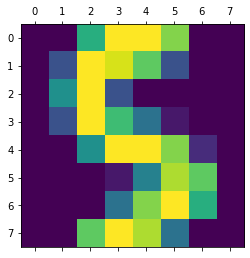

In [21]:
plt.matshow(X_test[9].reshape(8,8))

In [22]:
X_test[9].reshape(8,8)

array([[ 0.,  0., 10., 16., 16., 13.,  0.,  0.],
       [ 0.,  4., 16., 15., 12.,  4.,  0.,  0.],
       [ 0.,  8., 16.,  4.,  0.,  0.,  0.,  0.],
       [ 0.,  4., 16., 11.,  6.,  1.,  0.,  0.],
       [ 0.,  0.,  8., 16., 16., 13.,  2.,  0.],
       [ 0.,  0.,  0.,  1.,  7., 14., 12.,  0.],
       [ 0.,  0.,  0.,  6., 13., 16., 10.,  0.],
       [ 0.,  0., 12., 16., 14.,  6.,  0.,  0.]])

In [23]:
y_test[9]#verified with the target data. Its correct

5

### Decision Tree Algorithm

In [24]:
X=mnist.data
y=mnist.target

In [25]:
X.shape

(1797, 64)

In [26]:
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.14,random_state=21,stratify=y)
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
prediction = dt.predict(X_val)

print(prediction)
print(dt.score(X_val,y_val))


[1 2 4 3 3 1 4 4 3 0 1 2 2 8 7 8 1 6 8 7 4 9 9 9 0 1 3 6 4 1 2 7 4 9 7 0 7
 7 3 1 7 8 9 3 2 2 2 6 1 3 9 0 6 3 5 2 4 8 7 3 3 1 5 4 5 1 2 8 8 9 5 7 2 6
 3 3 1 0 2 4 5 4 2 7 7 3 2 6 9 5 7 0 9 9 1 6 7 5 5 6 5 7 8 5 8 6 1 4 8 1 1
 5 0 0 0 3 1 5 8 2 6 1 9 3 3 5 7 6 8 9 3 5 5 5 2 8 3 8 4 6 6 7 6 6 6 2 0 6
 3 3 8 4 5 8 0 0 9 9 4 2 1 0 0 7 3 3 7 5 8 5 7 9 9 2 7 0 2 8 0 5 9 2 2 4 9
 2 2 6 7 8 9 3 8 9 2 4 8 1 6 7 5 8 3 2 7 4 0 4 6 3 2 5 8 4 8 0 0 6 9 0 9 1
 0 8 0 6 0 1 3 6 3 9 3 0 9 1 8 6 9 8 1 5 4 0 1 3 3 6 4 1 5 6]
0.8492063492063492


In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.13,random_state=30,stratify=y)
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictions = dt_model.predict(X_test)

accuracy_dt=accuracy_score(y_test, predictions)


In [28]:
print("EVALUATION ON TESTING DATA")
print(classification_report(y_test, predictions))

print ("Confusion matrix")
print(confusion_matrix(y_test,predictions))

EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        23
           1       0.83      0.83      0.83        24
           2       0.83      0.87      0.85        23
           3       0.95      0.79      0.86        24
           4       0.88      0.96      0.92        23
           5       1.00      0.92      0.96        24
           6       0.88      0.92      0.90        24
           7       0.88      1.00      0.94        23
           8       0.78      0.78      0.78        23
           9       0.91      0.87      0.89        23

    accuracy                           0.89       234
   macro avg       0.89      0.89      0.89       234
weighted avg       0.89      0.89      0.89       234

Confusion matrix
[[22  0  0  0  0  0  0  0  1  0]
 [ 0 20  0  1  0  0  1  0  1  1]
 [ 0  1 20  0  0  0  1  0  1  0]
 [ 1  0  1 19  0  0  0  1  2  0]
 [ 0  0  0  0 22  0  1  0  0  0]
 [ 0  0  1  0  0 22  0  1  0  0]

In [29]:
print("Decision tree achieved highest accuracy of %.3f%% on test data" % (accuracy_dt*100))

Decision tree achieved highest accuracy of 88.889% on test data


In [30]:
print(predictions)
print(dt_model.score(X_test,y_test))

[2 1 5 1 7 4 0 8 6 5 2 7 9 5 4 8 4 7 4 1 5 3 8 9 1 1 4 6 9 8 2 1 2 8 5 0 9
 3 4 2 8 3 3 5 1 1 1 7 3 4 4 3 0 7 8 7 5 5 2 0 5 1 6 0 2 4 0 4 7 9 2 2 3 3
 6 2 3 8 9 6 4 4 2 9 4 8 2 0 3 0 8 2 7 6 0 3 6 9 7 4 9 9 2 4 1 2 1 8 7 4 0
 9 7 3 7 0 8 5 3 7 9 8 7 8 7 9 4 3 0 8 2 1 8 5 6 5 9 3 6 2 0 1 4 9 7 1 1 7
 0 8 0 1 2 9 8 6 7 5 7 0 3 6 5 7 8 3 4 6 6 9 9 4 1 1 1 7 1 6 1 2 0 4 3 6 2
 7 6 3 5 4 7 7 8 0 5 6 9 0 6 6 2 4 2 9 9 1 4 8 2 5 5 9 6 6 2 0 1 4 6 6 7 0
 7 5 8 5 3 6 5 5 0 6 0 8]
0.8888888888888888


### Random Forest Algorithm

In [31]:
X=mnist.data
y=mnist.target

In [32]:
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.14,random_state=21,stratify=y)
rf=RandomForestClassifier(n_estimators=400)
rf.fit(X_train,y_train)
prediction = rf.predict(X_val)

print(prediction)
print(rf.score(X_val,y_val))


[1 2 4 9 3 1 0 4 3 0 1 2 2 8 7 8 1 6 8 7 4 9 9 9 0 3 3 6 4 1 2 7 4 9 7 0 7
 7 3 1 7 8 9 5 2 2 8 6 1 3 9 0 6 3 5 2 4 8 7 3 9 1 5 4 5 1 2 8 4 2 5 7 2 4
 3 3 1 0 2 4 5 4 3 7 7 3 2 6 9 5 7 0 9 9 2 6 7 5 5 6 5 7 8 5 8 6 1 4 2 1 1
 4 0 9 0 9 1 8 8 1 5 1 9 3 3 5 7 6 8 9 1 5 5 5 2 8 3 8 4 6 6 7 6 6 6 2 0 6
 3 3 4 4 5 8 0 0 8 9 4 1 1 0 0 7 3 7 7 5 8 5 4 9 7 2 7 0 2 9 0 5 3 2 3 7 9
 2 2 6 7 8 9 3 8 9 2 4 8 1 6 7 5 8 3 2 7 6 0 4 6 3 2 5 8 4 4 0 0 6 9 8 9 1
 0 8 0 6 0 1 3 6 9 9 3 0 4 1 2 6 9 8 1 5 4 0 1 5 3 6 4 1 5 6]
0.9761904761904762


In [33]:

accuracies = []

for k in [1,100,200,300,400,500,600,700]:
          model = RandomForestClassifier(n_estimators=k)
          model.fit(X_train,y_train)
          # evaluate the model and update the accuracies list
          score = model.score(X_val,y_val)
          print("k=%d, accuracy=%.2f%%" % (k, score * 100))
          accuracies.append(score*100)

k=1, accuracy=73.02%
k=100, accuracy=97.22%
k=200, accuracy=96.83%
k=300, accuracy=97.62%
k=400, accuracy=97.62%
k=500, accuracy=97.62%
k=600, accuracy=97.22%
k=700, accuracy=97.62%


In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.13,random_state=30,stratify=y)
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train,y_train)
predictions = rf_model.predict(X_test)

accuracy_rf=accuracy_score(y_test, predictions)

In [35]:
print("EVALUATION ON TESTING DATA")
print(classification_report(y_test, predictions))

print ("Confusion matrix")
print(confusion_matrix(y_test,predictions))

EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.96      1.00      0.98        24
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        23
           5       1.00      1.00      1.00        24
           6       1.00      1.00      1.00        24
           7       0.96      1.00      0.98        23
           8       1.00      0.96      0.98        23
           9       1.00      0.96      0.98        23

    accuracy                           0.99       234
   macro avg       0.99      0.99      0.99       234
weighted avg       0.99      0.99      0.99       234

Confusion matrix
[[23  0  0  0  0  0  0  0  0  0]
 [ 0 24  0  0  0  0  0  0  0  0]
 [ 0  0 23  0  0  0  0  0  0  0]
 [ 0  0  0 24  0  0  0  0  0  0]
 [ 0  0  0  0 23  0  0  0  0  0]
 [ 0  0  0  0  0 24  0  0  0  0]

In [50]:
print("KNN achieved highest accuracy of %.3f%% on test data" %  (accuracy*100) + "\n" +
      "Random Forest achieved highest accuracy of %.3f%% on test data" % (accuracy_rf*100)+ "\n" +
      "Decision tree achieved highest accuracy of %.3f%% on test data" % (accuracy_dt*100))

KNN achieved highest accuracy of 99.573% on test data
Random Forest achieved highest accuracy of 99.145% on test data
Decision tree achieved highest accuracy of 88.889% on test data
